In [3]:
import pandas as pd 
import numpy as np
#import datapane as dp
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pylab as plt
from datetime import datetime
import plotly.express as px
from  dash_bootstrap_templates  import  ThemeSwitchAIO
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 200

In [4]:
templates = [
    "lux",
    "cyborg",
    "vapor",
    "zephyr",
    "superhero"
    "simplex"
]

ThemeSwitchAIO(templates)

Div([Span([Label(className='fa fa-moon'), Switch(id={'component': 'ThemeSwitchAIO', 'subcomponent': 'switch', 'aio_id': '18166723-5a8e-497c-bd0a-f44522b10fea'}, className='d-inline-block ms-1', value=True), Label(className='fa fa-sun')]), Store(id={'component': 'ThemeSwitchAIO', 'subcomponent': 'store', 'aio_id': '18166723-5a8e-497c-bd0a-f44522b10fea'}, data=['lux', 'cyborg', 'vapor', 'zephyr', 'superherosimplex']), Div(id={'component': 'ThemeSwitchAIO', 'subcomponent': 'dummy_div', 'aio_id': '18166723-5a8e-497c-bd0a-f44522b10fea'})])

In [5]:
def tempo():
    tempo = datetime.now()
    return tempo
def final(x,y):
    print(f'Tempo de processamento:{x - y}')

arquivo = "Loja_de_Informática.xlsx"

checando tempo que arquivo demora ate abri

In [6]:
inicio = tempo()
df = pd.read_excel(arquivo)
fim = tempo()
print(df.shape)
final(fim,inicio)

(5156, 13)
Tempo de processamento:0:00:05.690186


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5156 entries, 0 to 5155
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Nota Fiscal    5156 non-null   int64         
 1   Data           5156 non-null   datetime64[ns]
 2   Vendedor       5156 non-null   object        
 3   Gerente        5156 non-null   object        
 4   Matriz         5156 non-null   object        
 5   Comissão       5156 non-null   object        
 6   % Comissão     5156 non-null   float64       
 7   Cidade/Estado  5156 non-null   object        
 8   Região         5156 non-null   object        
 9   Produto        5156 non-null   object        
 10  Qtde           5156 non-null   int64         
 11  Preço          5156 non-null   int64         
 12  Total          5156 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(7)
memory usage: 523.8+ KB


In [8]:
df.describe(include='all')

,Nota Fiscal,Data,Vendedor,Gerente,Matriz,Comissão,% Comissão,Cidade/Estado,Região,Produto,Qtde,Preço,Total
count,5156.000000,5156,5156,5156,5156,5156,5156.000000,5156,5156,5156,5156.000000,5156.000000,5156.000000
unique,NaN,1707,10,3,3,2,NaN,20,5,10,NaN,NaN,NaN
top,NaN,2014-08-12 00:00:00,Phelipe,Lucas,Sâo Paulo,Sim,NaN,Manaus/AM,Sudeste,Mouse Gamer,NaN,NaN,NaN
freq,NaN,9,545,2072,2088,3971,NaN,284,1791,580,NaN,NaN,NaN
first,NaN,2013-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2017-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3797.500000,NaN,NaN,NaN,NaN,NaN,0.087859,NaN,NaN,NaN,52.727114,36.843483,1941.531614
std,1488.553325,NaN,NaN,NaN,NaN,NaN,0.021442,NaN,NaN,NaN,24.921024,29.299883,1935.531667
min,1220.000000,NaN,NaN,NaN,NaN,NaN,0.050000,NaN,NaN,NaN,10.000000,6.000000,60.000000
25%,2508.750000,NaN,NaN,NaN,NaN,NaN,0.100000,NaN,NaN,NaN,31.000000,10.000000,529.500000


In [9]:
df.isna().sum()

Nota Fiscal      0
Data             0
Vendedor         0
Gerente          0
Matriz           0
Comissão         0
% Comissão       0
Cidade/Estado    0
Região           0
Produto          0
Qtde             0
Preço            0
Total            0
dtype: int64

In [115]:
# Calcula o z-score para a coluna 'Total'
z_scores = np.abs((df['Total'] - df['Total'].mean()) / df['Total'].std())

# Define um limite para o z-score (por exemplo, 3) para identificar outliers
limite_z_score = 1

# Filtra o dataframe para manter apenas as linhas onde o z-score é menor ou igual ao limite
df_sem_outliers = df[z_scores <= limite_z_score]


In [92]:
df.shape

(5156, 14)

In [112]:
df_sem_outliers.shape

(746, 14)

In [113]:
z_scores

0       1.037683
1       1.311510
2       0.190371
3       0.587193
4       0.845004
          ...   
5151    0.050874
5152    0.548444
5153    0.711707
5154    1.662834
5155    0.340200
Name: Total, Length: 5156, dtype: float64

In [106]:
fig66 = px.histogram(df, x='Total', template='superhero',
                    title='Visualizando a distribuiçao dos dados total vendido')
fig66.update_layout(font=dict(size=25),title_font=dict(size=30))

In [116]:
fig67 = px.histogram(df_sem_outliers, x='Total', template='superhero',
                    title='Visualizando a distribuiçao dos dados total vendido')
fig67.update_layout(font=dict(size=25),title_font=dict(size=30))

In [10]:
#numero de venda de cada gerente gerente lucas possui 1 vendedor a mas 
df['Gerente'].value_counts()

Lucas       2072
David       1557
Daniella    1527
Name: Gerente, dtype: int64

In [11]:
#numero de venda de cada matriz
df['Matriz'].value_counts()

Sâo Paulo         2088
Curitibaa         1550
Belo Horizonte    1518
Name: Matriz, dtype: int64

In [12]:
#numero de vendas por regiao
df['Região'].value_counts()

Sudeste         1791
Centro-Oeste    1046
Norte            789
Sul              769
Nordeste         761
Name: Região, dtype: int64

In [13]:
#numero de vendas por cidade\estado
df['Cidade/Estado'].value_counts()

Manaus/AM             284
Goiânia/GO            276
Andradas/MG           276
Vitória/ES            273
Fortaleza/CE          262
Varginha/MG           260
Cuiabá/MT             260
Porto Alegre/RS       260
Campo Grande/MS       259
São Paulo/SP          256
Belém/PA              256
Curitiba/PR           255
Maceió/AL             254
Florianópolis/SC      254
Palmas/TO             251
Porto Velho/RO        249
Belo Horizonte/MG     248
Salvador/BA           245
Rio de Janeiro/RJ     244
Poços de Caldas/MG    234
Name: Cidade/Estado, dtype: int64

In [14]:
#numero de vendas por vendedor
df['Vendedor'].value_counts()

Phelipe     545
Deborah     528
Jéssica     528
Edson       520
Ricardo     519
Marina      513
Rodrigo     513
Henrique    509
Ronaldo     495
Jorge       486
Name: Vendedor, dtype: int64

In [15]:
#numero de vendas por produtos
df['Produto'].value_counts()

Mouse Gamer       580
Placa de Vídeo    537
Mouse Basic       517
Gabinete          509
Mousepad Gamer    507
Monitor Gamer     506
Mousepad          506
Monitor Basic     506
USB               496
Teclado           492
Name: Produto, dtype: int64

In [16]:
#vendo preco de cada produto mouse basic possui 2 preços 50 e 60 
df.groupby('Produto')['Preço'].unique()

Produto
Gabinete              [40]
Monitor Basic        [100]
Monitor Gamer         [70]
Mouse Basic       [50, 60]
Mouse Gamer           [10]
Mousepad               [6]
Mousepad Gamer        [18]
Placa de Vídeo        [25]
Teclado               [35]
USB                    [8]
Name: Preço, dtype: object

In [17]:
#quantidade de produtos vendidos destaque pro mouse gamer com 31877 vendas
df.groupby('Produto')['Qtde'].sum().sort_values(ascending=False)

Produto
Mouse Gamer       31877
Placa de Vídeo    28055
Gabinete          27961
Monitor Basic     26824
Monitor Gamer     26619
Mousepad Gamer    26534
Mouse Basic       26522
USB               25955
Mousepad          25950
Teclado           25564
Name: Qtde, dtype: int64

In [18]:
#temos a soma dos valores obtidos com as vendas dos produtos destaque monitor basic que possui maior valor 
df.groupby('Produto')['Total'].sum().sort_values(ascending=False)

Produto
Monitor Basic     2682400
Monitor Gamer     1863330
Mouse Basic       1590530
Gabinete          1118440
Teclado            894740
Placa de Vídeo     701375
Mousepad Gamer     477612
Mouse Gamer        318770
USB                207640
Mousepad           155700
Name: Total, dtype: int64

temos um grafico da quantidade de produtos vendidos podemos notar que as vendas sao parecidas
mas quando se olha para os valores monitor basic fica muito a frente pelo seu preço ser bem maior 
100 por unidade enquanto mouse pad que o produto mas barato custa apenas 6

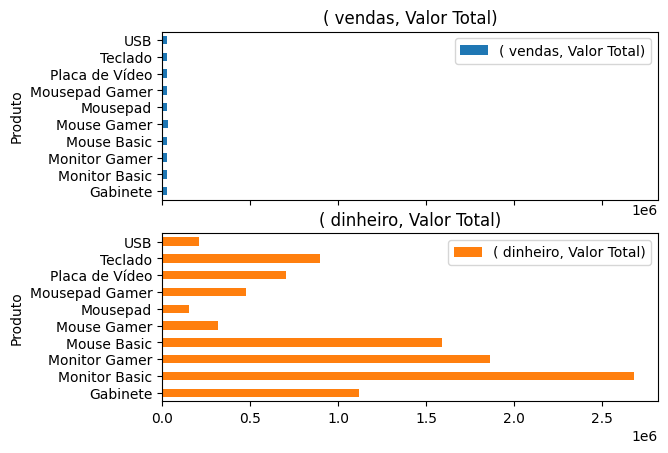

In [19]:
produtos_vendas  =  df.groupby('Produto')[['Qtde','Total']].agg([np.sum]).round()
produtos_vendas.rename(columns={'sum':'Valor Total','Qtde':' vendas','Total':' dinheiro'},inplace=True)
produtos_vendas.plot(kind='barh',subplots=True);

In [20]:
fig = px.box(df, x='Comissão', y='Total',template='superhero',width=1400,height=500,
             title='Venda total com Comissão e sem Comissão')
fig.update_layout(font=dict(size=32),title_font=dict(size=30))

In [21]:
fig1 = px.box(df, x='Matriz', y='Total',template='superhero'
              ,title='Vendas total de cada matriz')
fig1.update_layout(font=dict(size=25),title_font=dict(size=30))

In [22]:
fig2 =px.box(df, x='Produto', y='Qtde',template='superhero'
             ,title='Quantidade total de venda de cada produto')
fig2.update_layout(font=dict(size=25),title_font=dict(size=30))

In [23]:
fig3 = px.box(df, x='Produto', y='Total',template='superhero',
              title='Venda total de cada produto')
fig3.update_layout(font=dict(size=25),title_font=dict(size=30))


In [24]:
fig4 = px.box(df, x='Gerente', y='Total',template='superhero',
              title='Venda total de cada Gerente')
fig4.update_layout(font=dict(size=25),title_font=dict(size=30))

In [25]:
fig5 = px.box(df, x='Vendedor', y='Total',template='superhero',
              title='Venda total de cada Vendedor')
fig5.update_layout(font=dict(size=25),title_font=dict(size=30))

In [26]:
df

,Nota Fiscal,Data,Vendedor,Gerente,Matriz,Comissão,% Comissão,Cidade/Estado,Região,Produto,Qtde,Preço,Total
0,1220,2015-04-29,Phelipe,Lucas,Sâo Paulo,Sim,0.10,Poços de Caldas/MG,Sudeste,Mouse Basic,79,50,3950
1,1221,2016-05-21,Ricardo,Lucas,Belo Horizonte,Sim,0.10,Curitiba/PR,Sul,Monitor Gamer,64,70,4480
2,1222,2016-03-17,Ronaldo,Lucas,Sâo Paulo,Sim,0.10,Curitiba/PR,Sul,Monitor Gamer,33,70,2310
3,1223,2017-11-20,Marina,Lucas,Belo Horizonte,Não,0.05,Palmas/TO,Centro-Oeste,Teclado,23,35,805
4,1224,2013-03-18,Ronaldo,Lucas,Sâo Paulo,Sim,0.10,Cuiabá/MT,Centro-Oeste,Mousepad,51,6,306
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5151,6371,2014-01-19,Ricardo,Lucas,Belo Horizonte,Sim,0.10,Porto Velho/RO,Norte,Gabinete,51,40,2040
5152,6372,2014-07-08,Deborah,Daniella,Sâo Paulo,Sim,0.10,Goiânia/GO,Centro-Oeste,Mouse Gamer,88,10,880
5153,6373,2015-08-21,Marina,Lucas,Belo Horizonte,Sim,0.10,Curitiba/PR,Sul,Mousepad,94,6,564
5154,6374,2014-08-06,Jéssica,David,Curitibaa,Sim,0.10,Varginha/MG,Sudeste,Mouse Basic,86,60,5160


In [27]:
remover = ['Nota Fiscal','Data','% Comissão']
df_filtrado = df.drop(remover, axis=1)
informacoes = df_filtrado.groupby('Gerente').agg([np.mean, np.median, np.std,])
informacoes

Qtde                        Preço                    \
               mean median        std       mean median        std   
Gerente                                                              
Daniella  52.487885   53.0  24.942418  37.586771   35.0  28.874976   
David     52.196532   51.0  24.914866  37.009634   25.0  30.171158   
Lucas     53.302124   53.0  24.910180  36.170849   25.0  28.943305   

                Total                       
                 mean  median          std  
Gerente                                     
Daniella  1988.687623  1280.0  1935.156962  
David     1921.429672  1152.0  1964.516137  
Lucas     1921.884653  1212.0  1914.081787

In [28]:
def analiando(x):
    calculo = df_filtrado.groupby(x).agg([np.mean, np.median, np.std,]).round()
    return calculo

In [29]:
display(analiando('Gerente'))
print()
display(analiando('Vendedor'))

Qtde              Preço                Total                
          mean median   std  mean median   std    mean  median     std
Gerente                                                               
Daniella  52.0   53.0  25.0  38.0   35.0  29.0  1989.0  1280.0  1935.0
David     52.0   51.0  25.0  37.0   25.0  30.0  1921.0  1152.0  1965.0
Lucas     53.0   53.0  25.0  36.0   25.0  29.0  1922.0  1212.0  1914.0

Qtde              Preço                Total                
          mean median   std  mean median   std    mean  median     std
Vendedor                                                              
Deborah   53.0   53.0  25.0  38.0   35.0  29.0  1968.0  1279.0  1862.0
Edson     52.0   51.0  25.0  38.0   25.0  30.0  1969.0  1172.0  2016.0
Henrique  54.0   55.0  25.0  36.0   25.0  29.0  1917.0  1160.0  1890.0
Jorge     52.0   52.0  25.0  39.0   35.0  29.0  2052.0  1349.0  1948.0
Jéssica   51.0   49.0  25.0  37.0   25.0  31.0  1880.0  1140.0  1986.0
Marina    52.0   50.0  24.0  36.0   25.0  28.0  1906.0  1190.0  1902.0
Phelipe   53.0   54.0  26.0  35.0   25.0  29.0  1899.0  1100.0  2003.0
Ricardo   53.0   53.0  25.0  37.0   35.0  29.0  1892.0  1200.0  1847.0
Rodrigo   53.0   54.0  25.0  36.0   25.0  28.0  1950.0  1250.0  1999.0
Ronaldo   56.0   56.0  25.0  36.0   25.0  29.0  1995.0  1275.0  1900.0

In [30]:
from scipy import stats

# Amostra de exemplo
data = np.array(df['Total'])

# Executar o teste de Shapiro para saber se os dados tem uma distribuiçao normal
statistic, p_value = stats.shapiro(data)

# Imprimir os resultados
print('Estatística de teste:', statistic)
print('Valor p:', p_value)

# Interpretação do resultado
alpha = 0.05  # Nível de significância

if p_value > alpha:
    print('A amostra segue uma distribuição normal (não podemos rejeitar a hipótese nula)')
else:
    print('A amostra não segue uma distribuição normal (rejeitamos a hipótese nula)')


Estatística de teste: 0.8188644647598267
Valor p: 0.0
A amostra não segue uma distribuição normal (rejeitamos a hipótese nula)


In [31]:
fig6 = px.histogram(df, x='Total', template='superhero',
                    title='Visualizando a distribuiçao dos dados total vendido')
fig6.update_layout(font=dict(size=25),title_font=dict(size=30))

Visualizando a correlaçao dos dados da pra notar uma forte correlaçao do preco com o total
e Quantidade com a comissao 

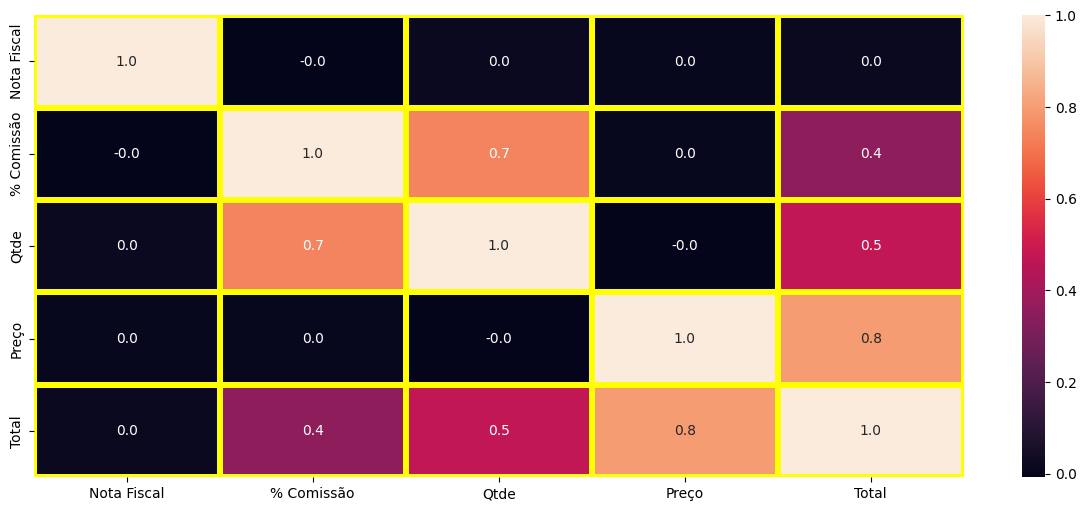

In [32]:
import seaborn as sn
correlaçao = df.corr()
plt.figure(figsize=(15, 6))

sn.heatmap(correlaçao, annot = True, fmt=".1f", linewidths=4, linecolor='yellow');  

In [33]:
def ajustando(x):
    if x > 29:
        return 'alto'
    else:
        return 'baixo'

In [34]:
df['Quantidade'] = df['Qtde'].apply(ajustando)

In [35]:
#todos os registros com menos de 30 em quantidade nao tem comissao 
#todos os registros com 30 ou mais de quantidade tem comissao 'sim'
testando_hipotese = df[(df['Quantidade'] == 'alto') & (df['Comissão'] == 'Sim')]
testando_hipotese

,Nota Fiscal,Data,Vendedor,Gerente,Matriz,Comissão,% Comissão,Cidade/Estado,Região,Produto,Qtde,Preço,Total,Quantidade
0,1220,2015-04-29,Phelipe,Lucas,Sâo Paulo,Sim,0.1,Poços de Caldas/MG,Sudeste,Mouse Basic,79,50,3950,alto
1,1221,2016-05-21,Ricardo,Lucas,Belo Horizonte,Sim,0.1,Curitiba/PR,Sul,Monitor Gamer,64,70,4480,alto
2,1222,2016-03-17,Ronaldo,Lucas,Sâo Paulo,Sim,0.1,Curitiba/PR,Sul,Monitor Gamer,33,70,2310,alto
4,1224,2013-03-18,Ronaldo,Lucas,Sâo Paulo,Sim,0.1,Cuiabá/MT,Centro-Oeste,Mousepad,51,6,306,alto
5,1225,2016-11-12,Jorge,Daniella,Belo Horizonte,Sim,0.1,Palmas/TO,Centro-Oeste,Mouse Gamer,52,10,520,alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5149,6369,2015-10-02,Ronaldo,Lucas,Sâo Paulo,Sim,0.1,Curitiba/PR,Sul,Mouse Basic,50,60,3000,alto
5151,6371,2014-01-19,Ricardo,Lucas,Belo Horizonte,Sim,0.1,Porto Velho/RO,Norte,Gabinete,51,40,2040,alto
5152,6372,2014-07-08,Deborah,Daniella,Sâo Paulo,Sim,0.1,Goiânia/GO,Centro-Oeste,Mouse Gamer,88,10,880,alto
5153,6373,2015-08-21,Marina,Lucas,Belo Horizonte,Sim,0.1,Curitiba/PR,Sul,Mousepad,94,6,564,alto


In [36]:
#se quantidade for 30 comissao e 'sim' e % Comissão igual 0.05.  qualquer valor abaixo de 30
# comissao vira 'nao' e %comissao vira 0.05
testando_hipotese2 = df[(df['% Comissão'] == 0.1) & (df['Qtde'] == 31)]
testando_hipotese2

,Nota Fiscal,Data,Vendedor,Gerente,Matriz,Comissão,% Comissão,Cidade/Estado,Região,Produto,Qtde,Preço,Total,Quantidade
18,1238,2015-08-11,Jorge,Daniella,Belo Horizonte,Sim,0.1,Goiânia/GO,Centro-Oeste,Monitor Basic,31,100,3100,alto
165,1385,2014-08-17,Edson,David,Sâo Paulo,Sim,0.1,Curitiba/PR,Sul,Gabinete,31,40,1240,alto
177,1397,2017-08-19,Edson,David,Sâo Paulo,Sim,0.1,Palmas/TO,Centro-Oeste,Mouse Gamer,31,10,310,alto
223,1443,2013-01-04,Phelipe,Lucas,Sâo Paulo,Sim,0.1,Cuiabá/MT,Centro-Oeste,Mousepad Gamer,31,18,558,alto
374,1594,2013-07-22,Deborah,Daniella,Sâo Paulo,Sim,0.1,Maceió/AL,Nordeste,Mouse Gamer,31,10,310,alto
498,1718,2014-05-19,Henrique,David,Curitibaa,Sim,0.1,Varginha/MG,Sudeste,Monitor Basic,31,100,3100,alto
648,1868,2015-07-02,Jorge,Daniella,Belo Horizonte,Sim,0.1,Porto Alegre/RS,Sul,Monitor Gamer,31,70,2170,alto
796,2016,2017-07-26,Phelipe,Lucas,Sâo Paulo,Sim,0.1,Maceió/AL,Nordeste,Monitor Gamer,31,70,2170,alto
894,2114,2015-06-29,Jéssica,David,Curitibaa,Sim,0.1,Belém/PA,Norte,Mouse Gamer,31,10,310,alto
994,2214,2015-02-15,Rodrigo,Daniella,Curitibaa,Sim,0.1,Poços de Caldas/MG,Sudeste,Mousepad,31,6,186,alto


In [37]:
df[(df['% Comissão'] == 0.05) & (df['Qtde'] == 10)]

,Nota Fiscal,Data,Vendedor,Gerente,Matriz,Comissão,% Comissão,Cidade/Estado,Região,Produto,Qtde,Preço,Total,Quantidade
108,1328,2013-02-21,Ronaldo,Lucas,Sâo Paulo,Não,0.05,Goiânia/GO,Centro-Oeste,Mouse Gamer,10,10,100,baixo
295,1515,2016-06-30,Edson,David,Sâo Paulo,Não,0.05,Varginha/MG,Sudeste,Monitor Basic,10,100,1000,baixo
309,1529,2014-03-16,Jorge,Daniella,Belo Horizonte,Não,0.05,Manaus/AM,Norte,Mousepad Gamer,10,18,180,baixo
347,1567,2017-05-05,Ronaldo,Lucas,Sâo Paulo,Não,0.05,Vitória/ES,Sudeste,Placa de Vídeo,10,25,250,baixo
433,1653,2015-03-25,Henrique,David,Curitibaa,Não,0.05,Salvador/BA,Nordeste,Mousepad Gamer,10,18,180,baixo
511,1731,2017-12-01,Phelipe,Lucas,Sâo Paulo,Não,0.05,Curitiba/PR,Sul,Mousepad,10,6,60,baixo
711,1931,2013-06-15,Ronaldo,Lucas,Sâo Paulo,Não,0.05,Salvador/BA,Nordeste,Mouse Basic,10,60,600,baixo
918,2138,2013-03-05,Henrique,David,Curitibaa,Não,0.05,Vitória/ES,Sudeste,Mousepad,10,6,60,baixo
1053,2273,2016-04-06,Phelipe,Lucas,Sâo Paulo,Não,0.05,Varginha/MG,Sudeste,USB,10,8,80,baixo
1101,2321,2016-03-29,Marina,Lucas,Belo Horizonte,Não,0.05,Cuiabá/MT,Centro-Oeste,USB,10,8,80,baixo


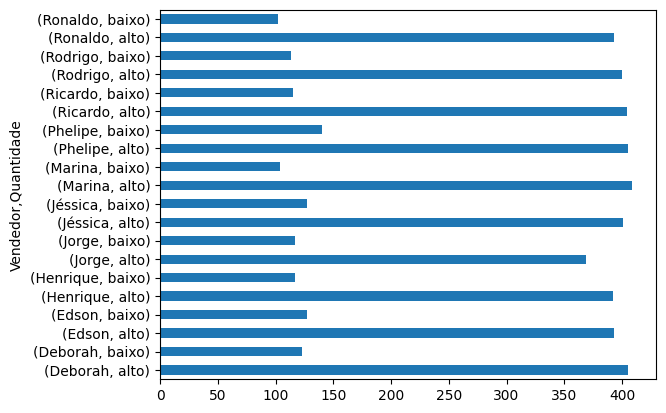

In [38]:
#da pra notar que quantidade de venda alta sao bem parecidas oscilando entre 360 e 410
# e a venda baixa oscilando entre 100 e 140
df.groupby('Vendedor')['Quantidade'].value_counts().plot(kind='barh');

In [39]:
df

,Nota Fiscal,Data,Vendedor,Gerente,Matriz,Comissão,% Comissão,Cidade/Estado,Região,Produto,Qtde,Preço,Total,Quantidade
0,1220,2015-04-29,Phelipe,Lucas,Sâo Paulo,Sim,0.10,Poços de Caldas/MG,Sudeste,Mouse Basic,79,50,3950,alto
1,1221,2016-05-21,Ricardo,Lucas,Belo Horizonte,Sim,0.10,Curitiba/PR,Sul,Monitor Gamer,64,70,4480,alto
2,1222,2016-03-17,Ronaldo,Lucas,Sâo Paulo,Sim,0.10,Curitiba/PR,Sul,Monitor Gamer,33,70,2310,alto
3,1223,2017-11-20,Marina,Lucas,Belo Horizonte,Não,0.05,Palmas/TO,Centro-Oeste,Teclado,23,35,805,baixo
4,1224,2013-03-18,Ronaldo,Lucas,Sâo Paulo,Sim,0.10,Cuiabá/MT,Centro-Oeste,Mousepad,51,6,306,alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5151,6371,2014-01-19,Ricardo,Lucas,Belo Horizonte,Sim,0.10,Porto Velho/RO,Norte,Gabinete,51,40,2040,alto
5152,6372,2014-07-08,Deborah,Daniella,Sâo Paulo,Sim,0.10,Goiânia/GO,Centro-Oeste,Mouse Gamer,88,10,880,alto
5153,6373,2015-08-21,Marina,Lucas,Belo Horizonte,Sim,0.10,Curitiba/PR,Sul,Mousepad,94,6,564,alto
5154,6374,2014-08-06,Jéssica,David,Curitibaa,Sim,0.10,Varginha/MG,Sudeste,Mouse Basic,86,60,5160,alto


Jogando a coluna Data para index ordenando por index

In [40]:
df2 = df.set_index('Data').sort_index()
df2.head(10)

,Nota Fiscal,Vendedor,Gerente,Matriz,Comissão,% Comissão,Cidade/Estado,Região,Produto,Qtde,Preço,Total,Quantidade
Data,,,,,,,,,,,,,
2013-01-01,2110,Marina,Lucas,Belo Horizonte,Não,0.05,Varginha/MG,Sudeste,USB,17,8,136,baixo
2013-01-01,5511,Jorge,Daniella,Belo Horizonte,Sim,0.10,Rio de Janeiro/RJ,Sudeste,Mousepad Gamer,70,18,1260,alto
2013-01-03,5516,Ronaldo,Lucas,Sâo Paulo,Sim,0.10,Goiânia/GO,Centro-Oeste,Mousepad,54,6,324,alto
2013-01-03,5400,Deborah,Daniella,Sâo Paulo,Sim,0.10,Fortaleza/CE,Nordeste,Mousepad Gamer,79,18,1422,alto
2013-01-04,4544,Jorge,Daniella,Belo Horizonte,Sim,0.10,Belo Horizonte/MG,Sudeste,Mousepad,36,6,216,alto
2013-01-04,6225,Marina,Lucas,Belo Horizonte,Sim,0.10,Varginha/MG,Sudeste,Mousepad,92,6,552,alto
2013-01-04,1443,Phelipe,Lucas,Sâo Paulo,Sim,0.10,Cuiabá/MT,Centro-Oeste,Mousepad Gamer,31,18,558,alto
2013-01-05,3881,Deborah,Daniella,Sâo Paulo,Não,0.05,São Paulo/SP,Sudeste,Placa de Vídeo,11,25,275,baixo
2013-01-06,4771,Ronaldo,Lucas,Sâo Paulo,Sim,0.10,São Paulo/SP,Sudeste,Placa de Vídeo,43,25,1075,alto


agrupando por Gerentes e matriz chego a soma e media 

In [41]:
df3 = df2.groupby(['Gerente','Matriz']).agg([np.sum, np.mean]).round()
df3


Nota Fiscal         % Comissão        Qtde        \
                                sum    mean        sum mean    sum  mean   
Gerente  Matriz                                                            
Daniella Belo Horizonte     1834483  3775.0       42.0  0.0  25220  52.0   
         Curitibaa          1931495  3765.0       45.0  0.0  27044  53.0   
         Sâo Paulo          1983800  3757.0       46.0  0.0  27885  53.0   
David    Curitibaa          3985072  3843.0       91.0  0.0  54447  53.0   
         Sâo Paulo          1933168  3718.0       45.0  0.0  26823  52.0   
Lucas    Belo Horizonte     3943515  3821.0       92.0  0.0  54172  52.0   
         Sâo Paulo          3968377  3816.0       92.0  0.0  56270  54.0   

                         Preço          Total          
                           sum  mean      sum    mean  
Gerente  Matriz                                        
Daniella Belo Horizonte  19140  39.0   997087  2052.0  
         Curitibaa       18421  36.0  1000435  1950.0  
         Sâo Paulo       19834  38.0  1039204  1968.0  
David    Curitibaa       37889  37.0  1968017  1898.0  
         Sâo Paulo       19735  38.0  1023649  1969.0  
Lucas    Belo Horizonte  37697  37.0  1959474  1899.0  
         Sâo Paulo       37249  36.0  2022671  1945.0

In [42]:
df4 = df2.groupby(['Gerente','Região']).agg([np.sum, np.mean])
df4

Nota Fiscal              % Comissão             Qtde  \
                              sum         mean        sum      mean    sum   
Gerente  Região                                                              
Daniella Centro-Oeste     1229584  3760.195719      28.95  0.088532  17559   
         Nordeste          772734  3733.014493      18.15  0.087681  10741   
         Norte             840981  3822.640909      19.00  0.086364  11428   
         Sudeste          2047759  3820.445896      46.25  0.086287  27277   
         Sul               858720  3623.291139      21.40  0.090295  13144   
David    Centro-Oeste     1186446  3790.562300      27.70  0.088498  16608   
         Nordeste          852469  3627.527660      20.70  0.088085  12416   
         Norte             981354  3909.776892      21.95  0.087450  13206   
         Sudeste          1998504  3865.578337      45.55  0.088104  26770   
         Sul               899467  3732.228216      20.35  0.084440  12270   
Lucas    Centro-Oeste     1561106  3845.088670      35.90  0.088424  21691   
         Nordeste         1214230  3806.363636      28.05  0.087931  16983   
         Norte            1192725  3750.707547      28.05  0.088208  17268   
         Sudeste          2808363  3805.369919      65.40  0.088618  39041   
         Sul              1135468  3901.951890      25.60  0.087973  15459   

                                  Preço               Total               
                            mean    sum       mean      sum         mean  
Gerente  Região                                                           
Daniella Centro-Oeste  53.697248  12133  37.103976   648930  1984.495413  
         Nordeste      51.888889   8515  41.135266   432974  2091.661836  
         Norte         51.945455   8719  39.631818   463419  2106.450000  
         Sudeste       50.889925  19778  36.899254  1026399  1914.923507  
         Sul           55.459916   8250  34.810127   465004  1962.042194  
David    Centro-Oeste  53.060703  11222  35.853035   580344  1854.134185  
         Nordeste      52.834043   8172  34.774468   425278  1809.693617  
         Norte         52.613546   9576  38.151394   485018  1932.342629  
         Sudeste       51.779497  19315  37.359768  1025946  1984.421663  
         Sul           50.912863   9339  38.751037   475080  1971.286307  
Lucas    Centro-Oeste  53.426108  14972  36.876847   789088  1943.566502  
         Nordeste      53.238245  10439  32.724138   551067  1727.482759  
         Norte         54.301887  12083  37.996855   676270  2126.635220  
         Sudeste       52.901084  27407  37.136856  1457081  1974.364499  
         Sul           53.123711  10045  34.518900   508639  1747.900344

In [43]:
df5 = df2.groupby(['Gerente','Cidade/Estado']).agg([np.sum,np.mean])
df5

Nota Fiscal              % Comissão            \
                                    sum         mean        sum      mean   
Gerente  Cidade/Estado                                                      
Daniella Andradas/MG             330016  3837.395349       7.45  0.086628   
         Belo Horizonte/MG       271701  3881.442857       5.95  0.085000   
         Belém/PA                297339  3763.784810       6.75  0.085443   
         Campo Grande/MS         304022  3662.915663       7.20  0.086747   
         Cuiabá/MT               327243  3761.413793       7.60  0.087356   
         Curitiba/PR             290932  3591.753086       7.45  0.091975   
         Florianópolis/SC        283713  3502.629630       7.25  0.089506   
         Fortaleza/CE            266016  3644.054795       6.30  0.086301   
         Goiânia/GO              307752  3846.900000       7.15  0.089375   
         Maceió/AL               272852  3897.885714       6.25  0.089286   
         Manaus/AM               273645  4146.136364       5.70  0.086364   
         Palmas/TO               290567  3773.597403       7.00  0.090909   
         Porto Alegre/RS         284075  3787.666667       6.70  0.089333   
         Porto Velho/RO          269997  3599.960000       6.55  0.087333   
         Poços de Caldas/MG      331347  4090.703704       7.25  0.089506   
         Rio de Janeiro/RJ       244297  3817.140625       5.45  0.085156   
         Salvador/BA             233866  3654.156250       5.60  0.087500   
         São Paulo/SP            309738  3777.292683       6.95  0.084756   
         Varginha/MG             283301  3679.233766       6.60  0.085714   
         Vitória/ES              277359  3649.460526       6.60  0.086842   
David    Andradas/MG             281196  3799.945946       6.20  0.083784   
         Belo Horizonte/MG       308293  3759.670732       7.20  0.087805   
         Belém/PA                322882  3843.833333       7.10  0.084524   
         Campo Grande/MS         232190  3572.153846       5.65  0.086923   
         Cuiabá/MT               284934  3606.759494       6.90  0.087342   
         Curitiba/PR             278138  3708.506667       6.05  0.080667   
         Florianópolis/SC        324670  3959.390244       7.00  0.085366   
         Fortaleza/CE            271963  3531.987013       6.75  0.087662   
         Goiânia/GO              351449  3948.865169       7.90  0.088764   
         Maceió/AL               272746  3588.763158       7.10  0.093421   
         Manaus/AM               372879  4097.571429       7.90  0.086813   
         Palmas/TO               317873  3973.412500       7.25  0.090625   
         Porto Alegre/RS         296659  3531.654762       7.30  0.086905   
         Porto Velho/RO          285593  3757.802632       6.95  0.091447   
         Poços de Caldas/MG      248481  3764.863636       5.85  0.088636   
         Rio de Janeiro/RJ       264921  4075.707692       5.50  0.084615   
         Salvador/BA             307760  3753.170732       6.85  0.083537   
         São Paulo/SP            277239  3960.557143       6.45  0.092143   
         Varginha/MG             306252  3780.888889       7.35  0.090741   
         Vitória/ES              312122  3950.911392       7.00  0.088608   
Lucas    Andradas/MG             429600  3703.448276      10.65  0.091810   
         Belo Horizonte/MG       368890  3842.604167       8.50  0.088542   
         Belém/PA                354618  3813.096774       8.45  0.090860   
         Campo Grande/MS         411399  3706.297297      10.25  0.092342   
         Cuiabá/MT               377729  4018.393617       8.00  0.085106   
         Curitiba/PR             389806  3937.434343       8.85  0.089394   
         Florianópolis/SC        361354  3970.923077       8.05  0.088462   
         Fortaleza/CE            442519  3951.062500      10.00  0.089286   
         Goiânia/GO              407796  3811.177570       9.30  0.086916   
         Maceió/AL      

agrupado por gerentes observo quanto cada vendedor deles vendeu

In [44]:
df6 = df2.groupby('Gerente')['Vendedor'].value_counts()
df6

Gerente   Vendedor
Daniella  Deborah     528
          Rodrigo     513
          Jorge       486
David     Jéssica     528
          Edson       520
          Henrique    509
Lucas     Phelipe     545
          Ricardo     519
          Marina      513
          Ronaldo     495
Name: Vendedor, dtype: int64

da pra observa valor total das vendas de cada vendedor e quem sao os gerentes

In [45]:
df7 = df2.groupby(['Gerente','Vendedor'])['Total'].sum()
df7

Gerente   Vendedor
Daniella  Deborah     1039204
          Jorge        997087
          Rodrigo     1000435
David     Edson       1023649
          Henrique     975572
          Jéssica      992445
Lucas     Marina       977582
          Phelipe     1035095
          Ricardo      981892
          Ronaldo      987576
Name: Total, dtype: int64

In [46]:
df_filtro = df.filter(items=['Gerente','Total','Vendedor'],axis=1)
px.bar(df_filtro, x="Total",y=['Vendedor',"Gerente"],width=1350,height=600,color = 'Gerente')

In [47]:
df8 = pd.DataFrame(df7)
df9 = df8.reset_index()

In [48]:
px.bar(df9, x="Vendedor",y='Total',color='Gerente',width=1360,height=600, text_auto=True,barmode='relative')

podemos ver os produtos mas vendidos de cada gerente

In [49]:
df10 = df2.groupby('Gerente')['Produto'].value_counts()
df10

Gerente   Produto       
Daniella  Mouse Basic       170
          Mouse Gamer       170
          Placa de Vídeo    166
          Gabinete          160
          Teclado           155
          Monitor Gamer     149
          Mousepad Gamer    148
          Monitor Basic     146
          Mousepad          139
          USB               124
David     Mouse Gamer       196
          Monitor Basic     174
          Mousepad Gamer    158
          USB               156
          Mouse Basic       155
          Placa de Vídeo    149
          Gabinete          147
          Mousepad          147
          Teclado           139
          Monitor Gamer     136
Lucas     Placa de Vídeo    222
          Monitor Gamer     221
          Mousepad          220
          USB               216
          Mouse Gamer       214
          Gabinete          202
          Mousepad Gamer    201
          Teclado           198
          Mouse Basic       192
          Monitor Basic     186
Name: Produto, 

podemos ver a quantidade Preco e total de dinheiro da venda  de cada produto ordenado por qtde preco e total

In [50]:
df11= df2.groupby('Produto')['Qtde','Preço','Total'].sum()
print(df11.sort_values('Qtde',ascending=False))
print(df11.sort_values('Preço',ascending=False))
print(df11.sort_values('Total',ascending=False))

                 Qtde  Preço    Total
Produto                              
Mouse Gamer     31877   5800   318770
Placa de Vídeo  28055  13425   701375
Gabinete        27961  20360  1118440
Monitor Basic   26824  50600  2682400
Monitor Gamer   26619  35420  1863330
Mousepad Gamer  26534   9126   477612
Mouse Basic     26522  31010  1590530
USB             25955   3968   207640
Mousepad        25950   3036   155700
Teclado         25564  17220   894740
                 Qtde  Preço    Total
Produto                              
Monitor Basic   26824  50600  2682400
Monitor Gamer   26619  35420  1863330
Mouse Basic     26522  31010  1590530
Gabinete        27961  20360  1118440
Teclado         25564  17220   894740
Placa de Vídeo  28055  13425   701375
Mousepad Gamer  26534   9126   477612
Mouse Gamer     31877   5800   318770
USB             25955   3968   207640
Mousepad        25950   3036   155700
                 Qtde  Preço    Total
Produto                              
Monitor Basi

abrindo denovo arquivo so que com data como index 

In [51]:
df12 = pd.read_excel("Loja_de_Informática.xlsx",parse_dates =['Data'],index_col = 'Data')

In [52]:
data_time = df12['Total'].sort_index()

podemos ver total de dinheiro da venda de cada ano Simultaneamente

In [53]:
print(data_time['2013'].sum())
print(data_time['2014'].sum())
print(data_time['2015'].sum())
print(data_time['2016'].sum())
print(data_time['2017'].sum())

1980082
2022303
2099193
2002878
1906081


grafico da venda baseado por ano

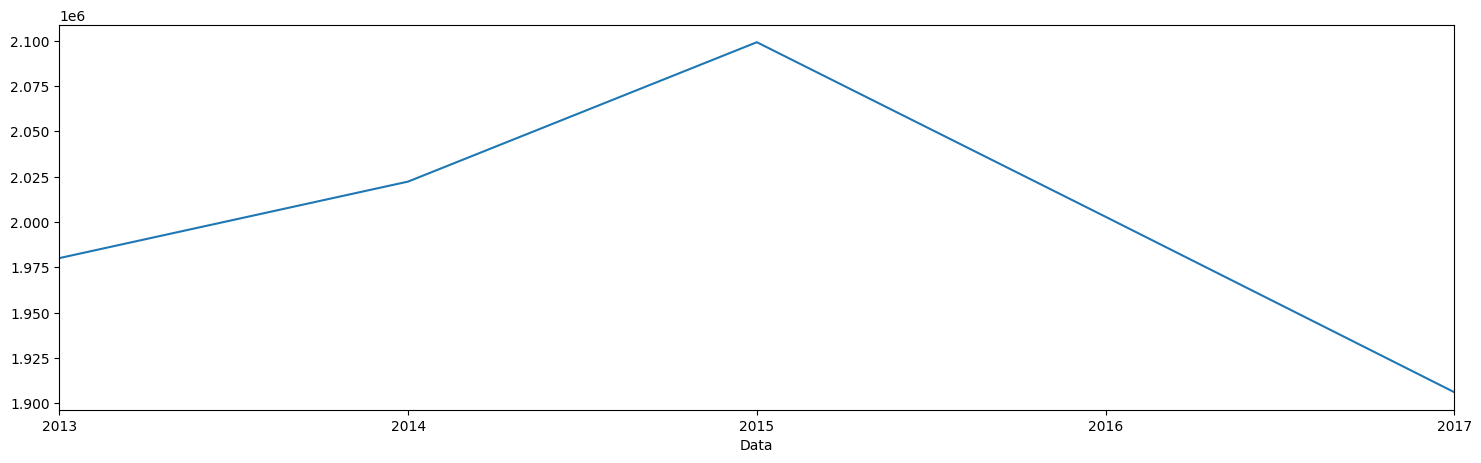

In [54]:
data_ano = data_time.resample('A').sum().plot(figsize=(18, 5))

grafico da venda baseado no mes

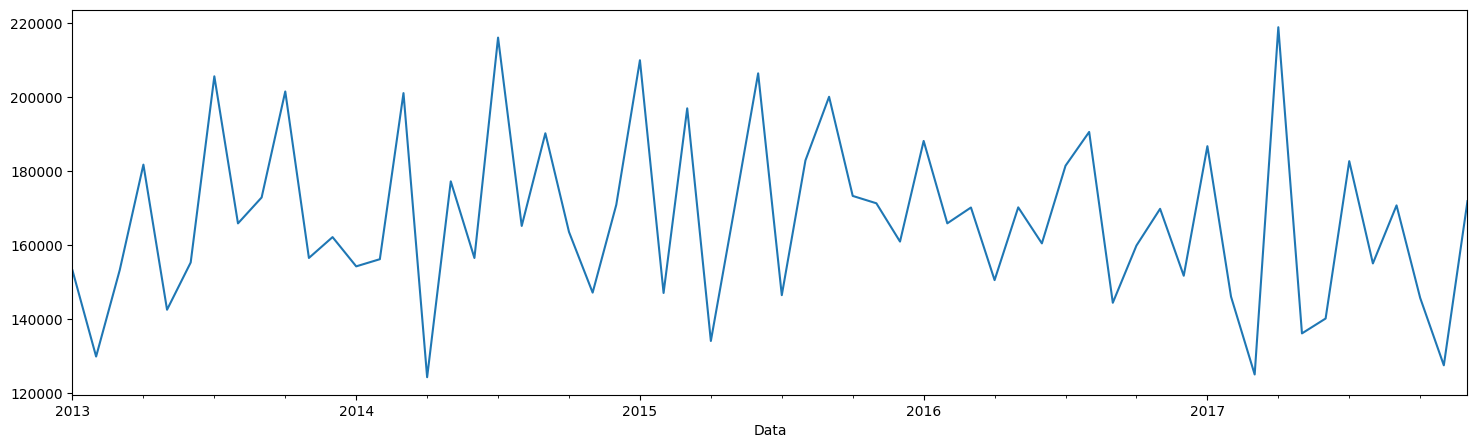

In [55]:
data_mes = data_time.resample('M').sum().plot(figsize=(18, 5))

grafico baseado nos dias de venda

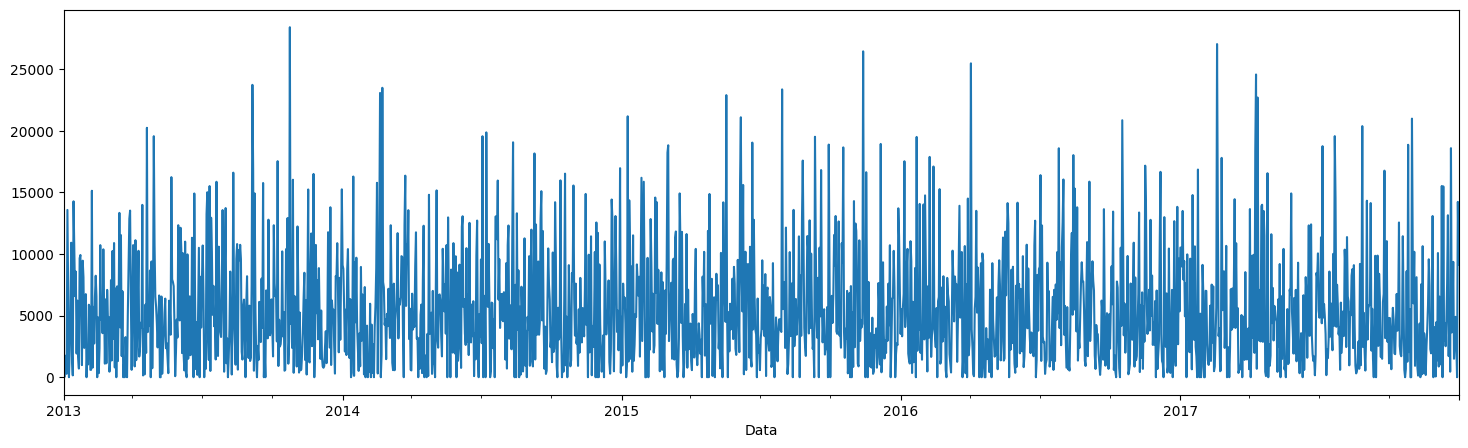

In [56]:
data_dia = data_time.resample('D').sum().plot(figsize=(18, 5))

grafico das vendas agrupado por meses 

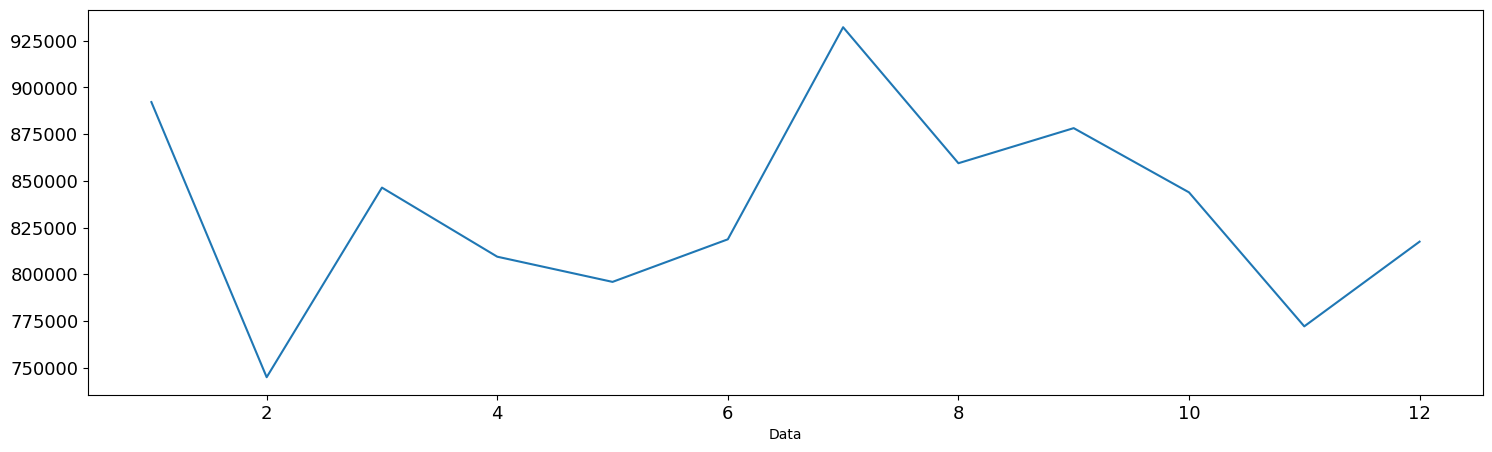

In [57]:
ts_mes = data_time.groupby([lambda x: x.month]).sum().plot(figsize=(18, 5),fontsize=13)

grafico das vendas agrupado pelo dia 

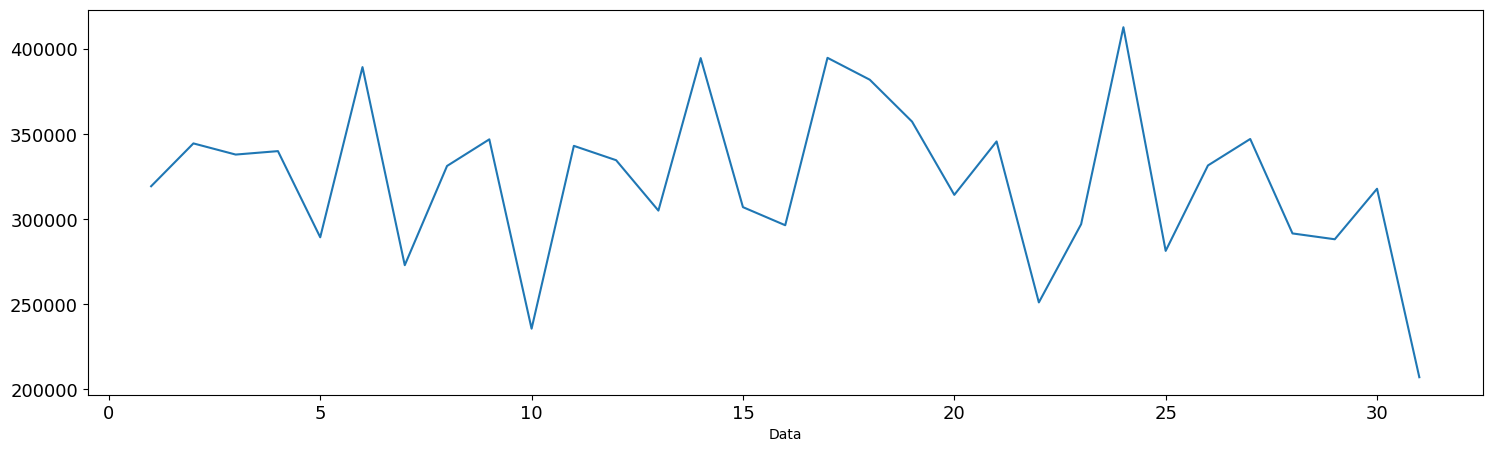

In [58]:
ts_mes = data_time.groupby([lambda x: x.day]).sum().plot(figsize=(18, 5),fontsize=13)

In [59]:
from statsmodels.tsa.arima_model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose


agrupado pelo mes podemos ver total de cada mes

In [60]:
arima = data_time.resample('M').sum()
arima

Data
2013-01-31    153124
2013-02-28    129807
2013-03-31    153236
2013-04-30    181736
2013-05-31    142470
2013-06-30    155256
2013-07-31    205632
2013-08-31    165834
2013-09-30    172850
2013-10-31    201535
2013-11-30    156479
2013-12-31    162123
2014-01-31    154206
2014-02-28    156145
2014-03-31    201089
2014-04-30    124207
2014-05-31    177211
2014-06-30    156473
2014-07-31    216111
2014-08-31    165144
2014-09-30    190219
2014-10-31    163522
2014-11-30    147102
2014-12-31    170874
2015-01-31    209981
2015-02-28    147005
2015-03-31    196967
2015-04-30    134018
2015-05-31    169957
2015-06-30    206433
2015-07-31    146413
2015-08-31    182871
2015-09-30    200094
2015-10-31    173267
2015-11-30    171275
2015-12-31    160912
2016-01-31    188147
2016-02-29    165851
2016-03-31    170134
2016-04-30    150487
2016-05-31    170173
2016-06-30    160424
2016-07-31    181438
2016-08-31    190582
2016-09-30    144355
2016-10-31    159841
2016-11-30    169779
2016-12-

In [61]:
decomposiçao = seasonal_decompose(arima)

In [62]:
tendencia = decomposiçao.trend
sazonal = decomposiçao.seasonal
aleatorio = decomposiçao.resid

plotando graficos original , tendencia dos dados , sazonalidade dos dados e aleatoridade dos dados

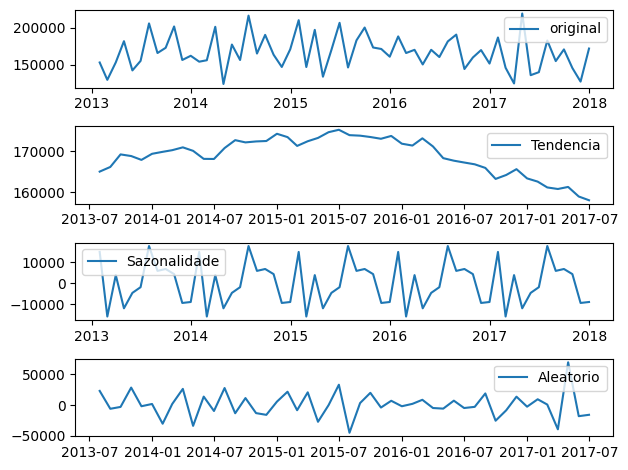

In [63]:
plt.subplot(4,1,1)
plt.plot(arima,label = 'original')
plt.legend(loc = 'best')

plt.subplot(4,1,2)
plt.plot(tendencia,label = 'Tendencia')
plt.legend(loc = 'best')

plt.subplot(4,1,3)
plt.plot(sazonal,label = 'Sazonalidade')
plt.legend(loc = 'best')

plt.subplot(4,1,4)
plt.plot(aleatorio,label = 'Aleatorio')
plt.legend(loc = 'best')
plt.tight_layout()

modelo arima para previsoes de 12 meses 

In [64]:
modelo_auto = auto_arima(arima, m = 12, seasonal = True, trace = False, method='lbfgs')

separando treino e teste

In [65]:
treino = arima.loc['2013-01-01':'2017-01-01']
teste = arima.loc['2017-01-01':]

treinando modelo

In [66]:
modelo_auto.fit(treino)

ARIMA(order=(0, 0, 1), scoring_args={}, seasonal_order=(0, 0, 1, 12),
      suppress_warnings=True)

testando modelo

In [67]:
previsao_futuro = modelo_auto.predict(n_periods=12)
previsao_futuro

2017-01-31    178602.014434
2017-02-28    170783.168069
2017-03-31    169830.954084
2017-04-30    167709.757707
2017-05-31    170844.606625
2017-06-30    166923.824312
2017-07-31    174532.852269
2017-08-31    174428.012517
2017-09-30    164091.392933
2017-10-31    168265.270986
2017-11-30    170389.886709
2017-12-31    167237.000720
Freq: M, dtype: float64

In [68]:
previsao_futuro = pd.DataFrame(previsao_futuro,index=teste.index,columns=['Total'])

vendo resultado em grafico da performance do modelo linha azul dados real linha laranja previsoes modelo

<AxesSubplot:xlabel='Data'>

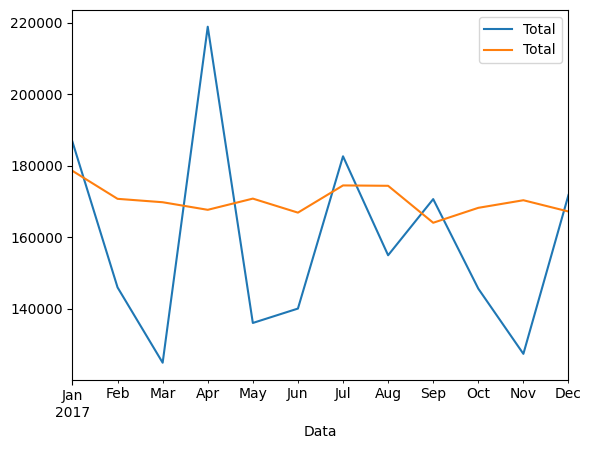

In [69]:
pd.concat([teste,previsao_futuro],axis=1).plot()

prevendo futuro 12 meses 

In [70]:
proximos_12 = auto_arima(arima, m = 12, seasonal = True, trace = False)
proximos_12_meses = proximos_12.predict(n_periods = 12)

proximos_12_meses 

2018-01-31    175046.702768
2018-02-28    162099.872906
2018-03-31    156922.881404
2018-04-30    182647.373565
2018-05-31    159482.837317
2018-06-30    162068.762376
2018-07-31    170562.647497
2018-08-31    163420.569109
2018-09-30    171121.785702
2018-10-31    162990.420386
2018-11-30    157399.182350
2018-12-31    170241.935975
Freq: M, dtype: float64

In [71]:
print(proximos_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   60
Model:             SARIMAX(0, 0, 1)x(0, 0, 1, 12)   Log Likelihood                -684.478
Date:                            Thu, 20 Jul 2023   AIC                           1376.955
Time:                                    11:40:37   BIC                           1385.333
Sample:                                01-31-2013   HQIC                          1380.232
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.683e+05   2509.431     67.052      0.000    1.63e+05    1.73e+05
ma.L1         -0.3214      0.145   

In [72]:
from sklearn.model_selection import train_test_split
X = df[['Qtde','Preço']]
y = df['Total']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [73]:
import sklearn.metrics as sk
from keras.models import Sequential
from keras.layers import Dense

# Criar o modelo Sequential
modelo = Sequential()

# Adicionar camadas ao modelo
modelo.add(Dense(units=32,  input_dim=2))  # Camada de entrada
modelo.add(Dense(units=32 ))  # Camada oculta
modelo.add(Dense(units=1)) # Camada de saída

# Compilar o modelo
modelo.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

# Resumo do modelo
modelo.fit(X_train, y_train, epochs=60, batch_size=40, verbose=0)


In [74]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                96        
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,185
Trainable params: 1,185
Non-trainable params: 0
_________________________________________________________________


In [75]:
previsoes = modelo.predict(X_test)

49/49 [==============================] - 0s 2ms/step


In [76]:
sk.mean_absolute_error(previsoes,y_test).round()

519.0

In [77]:
sk.r2_score(previsoes,y_test).round(2)

0.81

In [78]:
df

,Nota Fiscal,Data,Vendedor,Gerente,Matriz,Comissão,% Comissão,Cidade/Estado,Região,Produto,Qtde,Preço,Total,Quantidade
0,1220,2015-04-29,Phelipe,Lucas,Sâo Paulo,Sim,0.10,Poços de Caldas/MG,Sudeste,Mouse Basic,79,50,3950,alto
1,1221,2016-05-21,Ricardo,Lucas,Belo Horizonte,Sim,0.10,Curitiba/PR,Sul,Monitor Gamer,64,70,4480,alto
2,1222,2016-03-17,Ronaldo,Lucas,Sâo Paulo,Sim,0.10,Curitiba/PR,Sul,Monitor Gamer,33,70,2310,alto
3,1223,2017-11-20,Marina,Lucas,Belo Horizonte,Não,0.05,Palmas/TO,Centro-Oeste,Teclado,23,35,805,baixo
4,1224,2013-03-18,Ronaldo,Lucas,Sâo Paulo,Sim,0.10,Cuiabá/MT,Centro-Oeste,Mousepad,51,6,306,alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5151,6371,2014-01-19,Ricardo,Lucas,Belo Horizonte,Sim,0.10,Porto Velho/RO,Norte,Gabinete,51,40,2040,alto
5152,6372,2014-07-08,Deborah,Daniella,Sâo Paulo,Sim,0.10,Goiânia/GO,Centro-Oeste,Mouse Gamer,88,10,880,alto
5153,6373,2015-08-21,Marina,Lucas,Belo Horizonte,Sim,0.10,Curitiba/PR,Sul,Mousepad,94,6,564,alto
5154,6374,2014-08-06,Jéssica,David,Curitibaa,Sim,0.10,Varginha/MG,Sudeste,Mouse Basic,86,60,5160,alto


In [79]:
dfdd = df[df['Gerente'] == 'Lucas']
dfddd = dfdd[dfdd['Produto'] == 'Mouse Basic']

dfdddd = dfddd[dfddd['Data'] =='2015-04-29']

dfdddd

,Nota Fiscal,Data,Vendedor,Gerente,Matriz,Comissão,% Comissão,Cidade/Estado,Região,Produto,Qtde,Preço,Total,Quantidade
0,1220,2015-04-29,Phelipe,Lucas,Sâo Paulo,Sim,0.1,Poços de Caldas/MG,Sudeste,Mouse Basic,79,50,3950,alto


In [80]:
# Filtrar as datas que começam com "2015"
df_filtrado = dfddd[dfddd['Data'].dt.strftime('%Y').str.startswith('2015')]

# Exibir o DataFrame resultante
df_filtrado2 = df_filtrado[df_filtrado['Cidade/Estado'] == 'Rio de Janeiro/RJ']
df_filtrado2

,Nota Fiscal,Data,Vendedor,Gerente,Matriz,Comissão,% Comissão,Cidade/Estado,Região,Produto,Qtde,Preço,Total,Quantidade
210,1430,2015-01-29,Ricardo,Lucas,Belo Horizonte,Sim,0.10,Rio de Janeiro/RJ,Sudeste,Mouse Basic,50,60,3000,alto
2095,3315,2015-08-02,Ronaldo,Lucas,Sâo Paulo,Sim,0.10,Rio de Janeiro/RJ,Sudeste,Mouse Basic,95,60,5700,alto
2460,3680,2015-03-27,Ricardo,Lucas,Belo Horizonte,Não,0.05,Rio de Janeiro/RJ,Sudeste,Mouse Basic,14,60,840,baixo


In [81]:
df_filtrado

,Nota Fiscal,Data,Vendedor,Gerente,Matriz,Comissão,% Comissão,Cidade/Estado,Região,Produto,Qtde,Preço,Total,Quantidade
0,1220,2015-04-29,Phelipe,Lucas,Sâo Paulo,Sim,0.10,Poços de Caldas/MG,Sudeste,Mouse Basic,79,50,3950,alto
97,1317,2015-04-24,Ronaldo,Lucas,Sâo Paulo,Não,0.05,Belo Horizonte/MG,Sudeste,Mouse Basic,19,60,1140,baixo
210,1430,2015-01-29,Ricardo,Lucas,Belo Horizonte,Sim,0.10,Rio de Janeiro/RJ,Sudeste,Mouse Basic,50,60,3000,alto
321,1541,2015-01-23,Marina,Lucas,Belo Horizonte,Sim,0.10,Varginha/MG,Sudeste,Mouse Basic,50,60,3000,alto
357,1577,2015-08-31,Ronaldo,Lucas,Sâo Paulo,Sim,0.10,São Paulo/SP,Sudeste,Mouse Basic,46,60,2760,alto
390,1610,2015-03-29,Ronaldo,Lucas,Sâo Paulo,Sim,0.10,Porto Alegre/RS,Sul,Mouse Basic,75,60,4500,alto
692,1912,2015-04-13,Ronaldo,Lucas,Sâo Paulo,Sim,0.10,Manaus/AM,Norte,Mouse Basic,33,60,1980,alto
794,2014,2015-03-04,Marina,Lucas,Belo Horizonte,Não,0.05,Campo Grande/MS,Centro-Oeste,Mouse Basic,18,60,1080,baixo
999,2219,2015-01-29,Phelipe,Lucas,Sâo Paulo,Sim,0.10,Belém/PA,Norte,Mouse Basic,79,60,4740,alto
1014,2234,2015-01-16,Ronaldo,Lucas,Sâo Paulo,Sim,0.10,Vitória/ES,Sudeste,Mouse Basic,32,60,1920,alto


In [82]:
def ne(aa,ae):
    dd = df_filtrado
    
    fff = dd[aa == ae]
    return fff

In [83]:
nu = df_filtrado['Matriz']
nm = 'Sâo Paulo'
ne(nu,nm)

,Nota Fiscal,Data,Vendedor,Gerente,Matriz,Comissão,% Comissão,Cidade/Estado,Região,Produto,Qtde,Preço,Total,Quantidade
0,1220,2015-04-29,Phelipe,Lucas,Sâo Paulo,Sim,0.10,Poços de Caldas/MG,Sudeste,Mouse Basic,79,50,3950,alto
97,1317,2015-04-24,Ronaldo,Lucas,Sâo Paulo,Não,0.05,Belo Horizonte/MG,Sudeste,Mouse Basic,19,60,1140,baixo
357,1577,2015-08-31,Ronaldo,Lucas,Sâo Paulo,Sim,0.10,São Paulo/SP,Sudeste,Mouse Basic,46,60,2760,alto
390,1610,2015-03-29,Ronaldo,Lucas,Sâo Paulo,Sim,0.10,Porto Alegre/RS,Sul,Mouse Basic,75,60,4500,alto
692,1912,2015-04-13,Ronaldo,Lucas,Sâo Paulo,Sim,0.10,Manaus/AM,Norte,Mouse Basic,33,60,1980,alto
999,2219,2015-01-29,Phelipe,Lucas,Sâo Paulo,Sim,0.10,Belém/PA,Norte,Mouse Basic,79,60,4740,alto
1014,2234,2015-01-16,Ronaldo,Lucas,Sâo Paulo,Sim,0.10,Vitória/ES,Sudeste,Mouse Basic,32,60,1920,alto
1620,2840,2015-09-14,Ronaldo,Lucas,Sâo Paulo,Não,0.05,Salvador/BA,Nordeste,Mouse Basic,18,60,1080,baixo
1621,2841,2015-08-01,Phelipe,Lucas,Sâo Paulo,Sim,0.10,Fortaleza/CE,Nordeste,Mouse Basic,59,60,3540,alto
2056,3276,2015-01-14,Phelipe,Lucas,Sâo Paulo,Sim,0.10,São Paulo/SP,Sudeste,Mouse Basic,57,60,3420,alto
